# Imports

In [53]:
import numpy as np
import math
import schemdraw
import schemdraw.elements as elm
import random

# Genera Circuito

In [54]:
def dibujo_elemento(va):
  """
  Genera un número aleatorio entre 1 y 5 y devuelve un mensaje correspondiente.
  """
  numero_aleatorio = va
  if numero_aleatorio == 1:
    pass
  elif numero_aleatorio == 2:
    mensaje = elm.Line()
  elif numero_aleatorio == 3:
    mensaje = elm.Resistor()
  elif numero_aleatorio == 4:
    mensaje = elm.SourceV()
  else:  # numero_aleatorio == 5
    mensaje = elm.SourceI()

  return mensaje

# Ejemplo de uso:
#numero_aleatorio = random.randint(2, 5)
#mensaje_obtenido = obtener_mensaje_aleatorio(numero_aleatorio)
#print(mensaje_obtenido)

In [55]:
#para 1 malla
def generacircuito1malla(h,v):
    with schemdraw.Drawing() as d:
        d.config(unit=5)
        #izquierda vertical
        #x = dibujo_elemento(random.randint(2, 5))
        I1 = dibujo_elemento(v[0]).up()
        #I1 = elm.SourceV().label('20V')

        #superior horizontal
        HS = dibujo_elemento(h[0, 0]).right()
        #HS = elm.Resistor().right().label('400Ω')

        #derecha vertical
        D1 = dibujo_elemento(v[1]).down()
        #D1 = elm.SourceI().down().label('1A', loc='bot')

        #inferior horizontal
        #HI = elm.Line().left()
        HI = dibujo_elemento(h[1,0]).left().label('1A', loc='bot')
        #elm.Dot()
        #d.push()
        #R3 = elm.SourceI().down().label('100Ω', loc='bot', rotate=True)
        #R2 = elm.Resistor().down().label('100Ω', loc='bot', rotate=True)
        #elm.Dot()
        #d.pop()
        #I0 = elm.SourceV().right().label('1A', loc='bot')
        #L1 = elm.Line()
        #I1 = elm.SourceI().down().label('1A', loc='bot')
        #I1 = elm.Line().down()
        #L2 = elm.Line().tox(V1.start)
        #L2 = elm.Resistor().left().label('400Ω')
        #L3 = elm.Line().left()
        #elm.LoopCurrent([R1,R2,L2,V1], pad=1.25).label('$I_1$')
        #elm.LoopCurrent([R1,I1,L2,R2], pad=1.25).label('$I_2$')    # Use R1 as top element for both so they get the same height



In [56]:
#para 2 mallas
def generacircuito2mallas(h,v):
    with schemdraw.Drawing() as d:
        d.config(unit=5)
        V1 = dibujo_elemento(v[0]).up().label('20V')
        R1 = dibujo_elemento(h[0, 0]).right().label('400Ω')
        #elm.Dot()
        d.push()
        R3 = dibujo_elemento(v[1]).down().label('100Ω', loc='bot', rotate=True)
        #R2 = elm.Resistor().down().label('100Ω', loc='bot', rotate=True)
        #elm.Dot()
        d.pop()
        I0 = dibujo_elemento(h[0,1]).right().label('Label 1', loc='bot')
        #L1 = elm.Line()
        #I1 = elm.SourceI().down().label('1A', loc='bot')
        I1 = dibujo_elemento(v[2]).down()
        #L2 = elm.Line().tox(V1.start)
        L2 = dibujo_elemento(h[1,1]).left().label('400Ω')
        L3 = dibujo_elemento(h[1,0]).left()
        #elm.LoopCurrent([R1,R2,L2,V1], pad=1.25).label('$I_1$')
        #elm.LoopCurrent([R1,I1,L2,R2], pad=1.25).label('$I_2$')    # Use R1 as top element for both so they get the same height

# Funcion va

H:  [2 3]
V:  [[5]
 [4]]


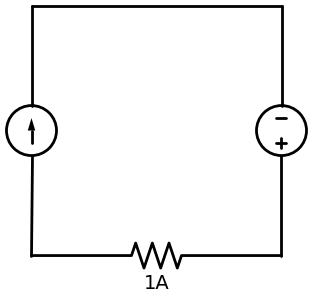

H:  [2 3 3 3]
V:  [[3]
 [4]
 [3]]


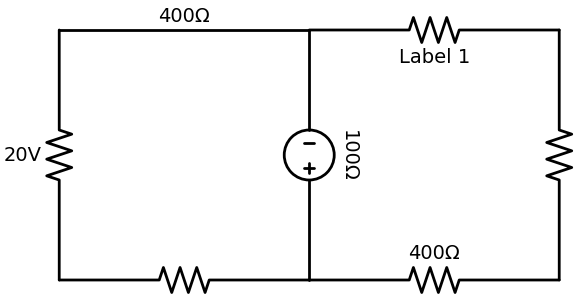

In [57]:

# Función equivalente a va(x, p, m, n) de MATLAB
def va(x, p, m, n):
    """
    Genera una matriz de m x n con elementos de x, siguiendo la distribución p.
    """
    return np.random.choice(x, size=(m, n), p=p)

# Ejemplo de prueba 1 malla
x = [2, 3, 4, 5]
p = [0.25, 0.25, 0.25, 0.25]
H = va(x, p, 2, 1)
V = va(x, p, 2, 1)

print("H: ",H.flatten())
print("V: ",V)


generacircuito1malla(H,V)

# Ejemplo de prueba 2 mallas
x = [2, 3, 4, 5]
p = [0.25, 0.25, 0.25, 0.25]
H = va(x, p, 2, 2)
V = va(x, p, 3, 1)

print("H: ",H.flatten())
print("V: ",V)

generacircuito2mallas(H,V)



# Actividad 1

In [58]:
# Simulación para la Actividad 1 (circuito de una malla)
# Evaluamos dos criterios de invalidez según las leyes de Kirchhoff

experimentos = 100_000
nocumple_corriente = 0
nocumple_24 = 0

for _ in range(experimentos):
    H = va(x, p, 1, 2)
    V = va(x, p, 1, 2)
    elementos = np.concatenate([H.flatten(), V.flatten()])

    # Criterio 1: más de una fuente de corriente (5)
    if np.sum(elementos == 5) > 1:
        nocumple_corriente += 1

    # Criterio 2: solo voltajes (4) y cortos (2), pero no todos cortos
    if np.all(np.isin(elementos, [2, 4])) and np.any(elementos == 4) and not np.all(elementos == 2):
        nocumple_24 += 1

# Resultados experimentales
fr_corriente = nocumple_corriente / experimentos
fr_24 = nocumple_24 / experimentos
fr_total = (nocumple_corriente + nocumple_24) / experimentos

# Resultados teóricos
total_combinaciones = 4**4  # 4 elementos, 4 opciones cada uno
# Combinaciones con 2 o más fuentes de corriente
inv_corriente = (
    (math.comb(4, 2) * 3**2) +  # 2 fuentes de corriente
    (math.comb(4, 3) * 3) +     # 3 fuentes de corriente
    1                              # 4 fuentes de corriente
)
teorico_corriente = inv_corriente / total_combinaciones

# Combinaciones con solo 2 y 4 (16 en total), excluyendo todos 2
teorico_24 = (2**4 - 1) / total_combinaciones
teorico_total = teorico_corriente + teorico_24

fr_corriente, fr_24, fr_total, teorico_corriente, teorico_24, teorico_total


(0.26198, 0.05747, 0.31945, 0.26171875, 0.05859375, 0.3203125)

# Actividad 2

In [59]:
# Simulación para la Actividad 2 (circuito de dos malla)
# Evaluamos tres criterios de invalidez según las leyes de Kirchhoff

import numpy as np
import math

# Simulación
experimentos = 1_000
inv_fuentes_seguidas = 0
inv_tres_corriente_medio = 0
inv_todas_resistencias = 0

for _ in range(experimentos):

    H = va(x, p, 1, 4).flatten()
    V = va(x, p, 1, 3).flatten()
    elementos = np.concatenate([H, V])
    
    malla_izq = [elementos[i] for i in [0, 2, 4, 5]]
    malla_der = [elementos[i] for i in [1, 3, 5, 6]]

    # Restricción 1: dos fuentes seguidas en la misma malla
    fuentes = [4, 5]
    if (elementos[0] in fuentes and elementos[4] in fuentes) or \
       (elementos[4] in fuentes and elementos[2] in fuentes) or \
       (elementos[1] in fuentes and elementos[6] in fuentes) or \
       (elementos[3] in fuentes and elementos[6] in fuentes) or \
       (elementos[5] in fuentes and elementos[0] in fuentes) or \
       (elementos[5] in fuentes and elementos[1] in fuentes) or \
       (elementos[5] in fuentes and elementos[2] in fuentes) or \
       (elementos[5] in fuentes and elementos[3] in fuentes):
          inv_fuentes_seguidas += 1
          continue

    # Restricción 2: tres fuentes de corriente en el medio
    if np.all(V == 5):
        inv_tres_corriente_medio += 1
        continue

    # Restricción 3: todos son resistencias (3)
    if np.all(elementos == 3):
        inv_todas_resistencias += 1
        continue

# Frecuencia experimental de casos inválidos
inv_total = inv_fuentes_seguidas + inv_tres_corriente_medio + inv_todas_resistencias
fr_inv = inv_total / experimentos
fr_valido = 1 - fr_inv

# Cálculo teórico
total_combinaciones = 4**7 

# Teórico: tres fuentes de corriente en el medio
inv_tres_corriente_medio_teo = 3**4 
# Teórico: solo resistencias
inv_todas_resistencias_teo = 1
# Teórico: dos fuentes seguidas en la misma malla  -- ----------------------------------------- 10110
inv_fuentes_sup = 4 * 4**5
inv_fuentes_inf = 4 * 4**5
# Intersección: fuentes en ambas mallas
interseccion = 4 * 4 * 4**3
inv_fuentes_seguidas_teo = inv_fuentes_sup + inv_fuentes_inf - interseccion

# Total inválidos teóricos
inv_total_teo = inv_tres_corriente_medio_teo + inv_todas_resistencias_teo + inv_fuentes_seguidas_teo
fr_valido_teo = (total_combinaciones - inv_total_teo) / total_combinaciones

# Resultados
print(f"FRECUENCIA EXPERIMENTAL:")
print(f"- Inválidos: {fr_inv:.5f}")
print(f"- Válidos:   {fr_valido:.5f}\n")

print(f"VALOR TEÓRICO:")
print(f"- Inválidos: {inv_total_teo} / {total_combinaciones} = {(inv_total_teo / total_combinaciones):.5f}")
print(f"- Válidos:   {fr_valido_teo:.5f}")

FRECUENCIA EXPERIMENTAL:
- Inválidos: 0.76400
- Válidos:   0.23600

VALOR TEÓRICO:
- Inválidos: 7250 / 16384 = 0.44250
- Válidos:   0.55750


# Actividad 3

## Probabilidad condicional 1 malla

In [60]:
def prob_condicional(elementos, x):
    p = np.ones(len(x), dtype=float)

    # Regla 1: máximo una fuente de corriente
    if np.sum(np.array(elementos) == 5) >= 1:
        p[np.array(x) == 5] = 0

    # Regla 2: evitar que el circuito se forme solo con fuentes de voltaje y cortos
    # pero permitir si todos son cortos
    if len(elementos) == 3:
        # solo hay cortos (2) y voltajes (4)
        if all(e in [2, 4] for e in elementos):
            # si no hay cortos, no permitir más voltajes o cortos
            if 2 not in elementos:
                # todos son voltajes (no permitido)
                p[np.isin(x, [2, 4])] = 0
            # si hay fuentes de voltaje y no hay resistencias
            elif 4 in elementos and 3 not in elementos:
                # hay mezcla de 2 y 4, pero sin resistencias: no permitir más 2 ni 4
                p[np.isin(x, [2, 4])] = 0

    p = p / np.sum(p)
    return p

## Generador circuito de una malla

In [62]:
# H, V, elementos_generados = generar_malla_valida()
# print(H, V, elementos_generados)

# Simulación
experimentos = 1000
inv_fuentes_voltaje = 0
inv_fuentes_corriente = 0
inv_total = 0
inv_todas_resistencias = 1

for _ in range(experimentos):

    H = va(x, p, 1, 4).flatten()
    V = va(x, p, 1, 3).flatten()
    elementos = np.concatenate([H, V])

    # print("H: ", H.flatten())
    # print("V: ", V.flatten())
    # print("Elementos: ", elementos)

    ## P[V U I]=P[V]+P[I] - P[V n I]

    ## V1 = [0,2,4]
    ## V2 = [1,3,6]
    
    ## V3 = [4,5,6]
    
    malla_izq = np.array([elementos[i] for i in [0, 2, 4]])
    malla_der = np.array([elementos[i] for i in [1, 3, 6]])
    elem_medio = elementos[5]
    borde_malla = np.array([elementos[i] for i in [0,1,2,3,4,6]])

    # print("Malla Izq: ", malla_izq)
    # print("Malla Der: ", malla_der)
    # print("Borde Malla: ", borde_malla)
    # print("Elemento Medio: ", elem_medio)

    # Restricción 1: dos fuentes de voltaje en la misma malla
    fuente_voltaje = 4
    
    if ((np.sum(malla_izq == fuente_voltaje) > 1) or (np.sum(malla_der == fuente_voltaje) > 1)):
        inv_fuentes_voltaje += 1
        inv_total += 1
    
    # Restricción 2: dos fuentes de corriente en la misma malla
    fuente_corriente = 5
    if (np.sum(malla_izq == fuente_corriente) > 1) or (np.sum(malla_der == fuente_corriente) > 1):
        inv_fuentes_corriente += 1
        inv_total += 1
    elif (np.sum(malla_izq == fuente_corriente) == 1) and (np.sum(malla_der == fuente_corriente) == 1) and (elem_medio == fuente_corriente):
        inv_fuentes_corriente += 1
        inv_total += 1

    # print("--------------------------------------------------")

print("Invalidez por fuentes de voltaje: ", inv_fuentes_voltaje)
print("Invalidez por fuentes de corriente: ", inv_fuentes_corriente)
print("Invalidez total corriente: ", inv_fuentes_corriente / experimentos)
print("Invalidez total voltaje: ", inv_fuentes_voltaje / experimentos)

inv_total2 = inv_fuentes_voltaje + inv_fuentes_corriente + inv_todas_resistencias
fr_inv = inv_total2 / experimentos
fr_valido = 1 - fr_inv
print("Invalidez total: ", inv_total2)
print("Frecuencia inválida: ", fr_inv)
print("Frecuencia válida: ", fr_valido)
# ---------------------------------- Cálculo teórico -------------------

# # P[V] - Voltajes 
# # 1933 / 16384 = 0.118
# # P[I] - Corrientes
# # 5449 / 16384 = 0.333

# total_combinaciones = 4**7 ## 16384 combinaciones posibles (7 elementos, 4 opciones cada uno)

# ---------------------- Corrientes I -------------------

inval_corriente_izq = (
    ((math.comb(3, 2) * 3) +     # 2 fuentes de corriente en una malla
    1) *                         # 3 fuentes de corriente en una malla
    4**4                       # 4 opciones y 4 elementos en la otra malla
) # = 2560

inval_corriente_der = (
    ((math.comb(3, 2) * 3) +     # 2 fuentes de corriente en una malla
    1) *                         # 3 fuentes de corriente en una malla
    4**4                       # 4 opciones y 4 elementos en la otra malla
) # = 2560

# Superposición de fuentes de corriente en ambas mallas
# 10 formas inválidas por cada malla independiente = 10 * 10 = 100
# Invalidez = 2560 + 2560 - 100 = 5020

inval_corriente_medio = (
    (math.comb(3, 1) * 3**2) * # Exactamente 1 fuente de corriente en una malla
    (math.comb(3, 1) * 3**2) * # Exactamente 1 fuente de corriente en la otra malla
    1                          # 1 fuente de corriente en el medio
) # = 729

print("Invalidez por fuentes de corriente en una malla: ", inval_corriente_izq)
print("Invalidez por fuentes de corriente en la otra malla: ", inval_corriente_der)
print("Invalidez por fuentes de corriente en el medio: ", inval_corriente_medio)
print("Invalidez total: ", (inval_corriente_izq + inval_corriente_der - 100) + inval_corriente_medio) # = 5749

# ---------------------- Voltajes V -------------------

# Una malla (dos o más fuentes de voltaje)
inval_voltaje_izq = (
    ((math.comb(3, 2) * 3) +     # 2 fuentes de voltaje en una malla
    1) *                         # 3 fuentes de voltaje en una malla
    4**4                       # 4 opciones y 4 elementos en la otra malla
) # = 2560

inval_voltaje_der = (
    ((math.comb(3, 2) * 3) +     # 2 fuentes de voltaje en una malla
    1) *                         # 3 fuentes de voltaje en una malla
    4**4                       # 4 opciones y 4 elementos en la otra malla
) # = 2560

# 10 * 10 * 4 = 400
# Invalidez = 2560 + 2560 - 400 = 4720

print("Invalidez por fuentes de voltaje en una malla: ", inval_voltaje_izq)
print("Invalidez por fuentes de voltaje en la otra malla: ", inval_voltaje_der)



Invalidez por fuentes de voltaje:  301
Invalidez por fuentes de corriente:  333
Invalidez total corriente:  0.333
Invalidez total voltaje:  0.301
Invalidez total:  635
Frecuencia inválida:  0.635
Frecuencia válida:  0.365
Invalidez por fuentes de corriente en una malla:  2560
Invalidez por fuentes de corriente en la otra malla:  2560
Invalidez por fuentes de corriente en el medio:  729
Invalidez total:  5749
Invalidez por fuentes de voltaje en una malla:  2560
Invalidez por fuentes de voltaje en la otra malla:  2560
